In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
loan_data = pd.read_csv('application_train.csv')

In [3]:
loan_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [4]:
loan_data.shape

(307511, 122)

We observe that there are 122 columns in this dataframe. We will take a look at the descriptions for each feature and decide whether or not some are needed, are redundant or can be merged into a single feature.

A few of the features that will be removed and the explanation why are these: <br><br>

- AMT_GOODS_PRICE: Seems redundant as we already have the total amount that's been loaned.
- DAYS_ID_PUBLISH; DAYS_REGISTRATION: Days since the applicant changed registration with which he applied for the loan cannot be too influential. A plot will try to explain this:

<AxesSubplot:xlabel='DAYS_REGISTRATION', ylabel='Count'>

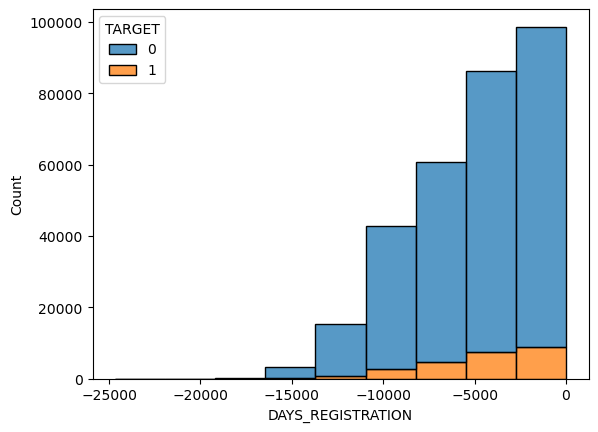

In [5]:
sns.histplot(bins = 9, x="DAYS_REGISTRATION", hue="TARGET", data=loan_data, stat="count", multiple="stack")

<AxesSubplot:xlabel='DAYS_ID_PUBLISH', ylabel='Count'>

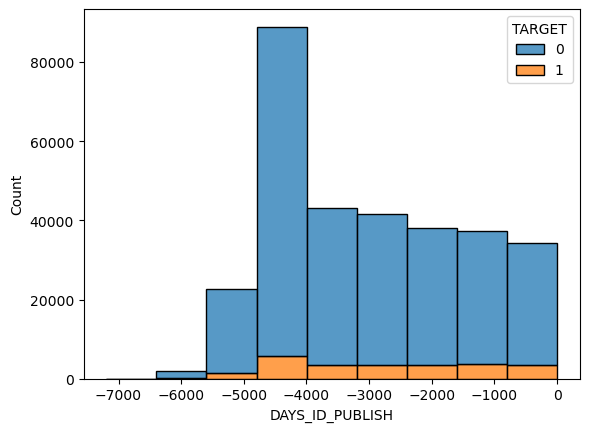

In [6]:
sns.histplot(bins = 9, x="DAYS_ID_PUBLISH", hue="TARGET", data=loan_data, stat="count", multiple="stack")


- OWN_CAR_AGE: Will likely move in opposite direction as client income. May cause collinearity.
- FLAG_MOBIL; FLAG_EMP_PHONE; FLAG_WORK_PHONE; FLAG_CONT_MOBILE; FLAG_PHONE; FLAG_EMAIL: Could be aggregated into a single feature 'Client_gave_contact_info', but will be pointless since the bank would never give a loan otherwise.
- WEEKDAY_APPR_PROCESS_START: Whether a client asked for a loan on a Monday or Tuesday cannot be the reason why he eventually defaulted. Any statistical significance while analyzing it will almost surely be due to luck and the feature will therefore be discarded.
- HOUR_APPR_PROCESS_START: Same as weekday
- REG_REGION_NOT_LIVE_REGION; REG_REGION_NOT_WORK_REGION; LIVE_REGION_NOT_WORK_REGION; REG_CITY_NOT_LIVE_CITY; REG_CITY_NOT_WORK_CITY; LIVE_CITY_NOT_WORK_CITY: If a client's contact address is different than his work address would make no difference in the odds of defaulting.
<br>We get into a chunk of features relating to the building in which the client lives. We will make the assumption that all of theses variables are relevant but will only take the average (which has been scaled) and drop the Mode and Median columns for these features.
<br><br>Columns dropped:

- APARTMENTS_
- BASEMENTAREA_
- YEARS_BEGINEXPLUATATION_
- YEARS_BUILD_
- COMMON_AREA_
- ELEVATORS_
- ENTRANCES_
- FLOORSMAX_
- FLOORSMIN_
- LANDAREA_
- LIVINGAPARTMENTS_
- LIVINGAREA_
- NONLIVINGAPARTMENTS_
- NONLIVINGAREA_

<br><br>
For days since last phone change, we repeat the process of plotting we did earlier for days since changing ID.

<AxesSubplot:xlabel='DAYS_LAST_PHONE_CHANGE', ylabel='Count'>

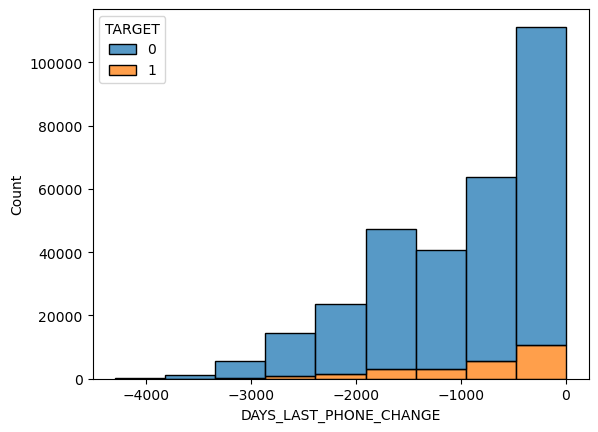

In [7]:
sns.histplot(bins = 9, x="DAYS_LAST_PHONE_CHANGE", hue="TARGET", data=loan_data, stat="count", multiple="stack")

We get a very similar result as with changing an ID. Any statistical significance between the two variables will likely be due to chance. Therefore we also drop the feature.
<br><br>
The next chunk of features we will remove are about flags regarding providing certain documents to the bank. As we do not know what these documents are the safer thing will be to delete them to try and avoid building a model which we won't be able to interpret with features we cannot understand.
<br>
Finally, we will be removing the final features, which are about number of enquires to the credit bureau in the last year. These enquiries are so rare that they are not often seen in neither defaulting nor non defaulting clients. The features will provide little to no predictive power.

In [19]:
columns_to_drop = """AMT_GOODS_PRICE
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
YEARS_BUILD_MODE
COMMONAREA_MODE
ELEVATORS_MODE
ENTRANCES_MODE
FLOORSMAX_MODE
FLOORSMIN_MODE
LANDAREA_MODE
LIVINGAPARTMENTS_MODE
LIVINGAREA_MODE
NONLIVINGAPARTMENTS_MODE
NONLIVINGAREA_MODE
APARTMENTS_MEDI
BASEMENTAREA_MEDI
YEARS_BEGINEXPLUATATION_MEDI
YEARS_BUILD_MEDI
COMMONAREA_MEDI
ELEVATORS_MEDI
ENTRANCES_MEDI
FLOORSMAX_MEDI
FLOORSMIN_MEDI
LANDAREA_MEDI
LIVINGAPARTMENTS_MEDI
LIVINGAREA_MEDI
NONLIVINGAPARTMENTS_MEDI
NONLIVINGAREA_MEDI
DAYS_LAST_PHONE_CHANGE
FLAG_DOCUMENT_2
FLAG_DOCUMENT_3
FLAG_DOCUMENT_4
FLAG_DOCUMENT_5
FLAG_DOCUMENT_6
FLAG_DOCUMENT_7
FLAG_DOCUMENT_8
FLAG_DOCUMENT_9
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11
FLAG_DOCUMENT_12
FLAG_DOCUMENT_13
FLAG_DOCUMENT_14
FLAG_DOCUMENT_15
FLAG_DOCUMENT_16
FLAG_DOCUMENT_17
FLAG_DOCUMENT_18
FLAG_DOCUMENT_19
FLAG_DOCUMENT_20
FLAG_DOCUMENT_21
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_YEAR"""

In [20]:
columns_to_drop = [columns_to_drop.split("\n")]

[['AMT_GOODS_PRICE',
  'DAYS_REGISTRATION',
  'DAYS_ID_PUBLISH',
  'OWN_CAR_AGE',
  'FLAG_MOBIL',
  'FLAG_EMP_PHONE',
  'FLAG_WORK_PHONE',
  'FLAG_CONT_MOBILE',
  'FLAG_PHONE',
  'FLAG_EMAIL',
  'WEEKDAY_APPR_PROCESS_START',
  'HOUR_APPR_PROCESS_START',
  'REG_REGION_NOT_LIVE_REGION',
  'REG_REGION_NOT_WORK_REGION',
  'LIVE_REGION_NOT_WORK_REGION',
  'REG_CITY_NOT_LIVE_CITY',
  'REG_CITY_NOT_WORK_CITY',
  'LIVE_CITY_NOT_WORK_CITY',
  'APARTMENTS_MODE',
  'BASEMENTAREA_MODE',
  'YEARS_BEGINEXPLUATATION_MODE',
  'YEARS_BUILD_MODE',
  'COMMONAREA_MODE',
  'ELEVATORS_MODE',
  'ENTRANCES_MODE',
  'FLOORSMAX_MODE',
  'FLOORSMIN_MODE',
  'LANDAREA_MODE',
  'LIVINGAPARTMENTS_MODE',
  'LIVINGAREA_MODE',
  'NONLIVINGAPARTMENTS_MODE',
  'NONLIVINGAREA_MODE',
  'APARTMENTS_MEDI',
  'BASEMENTAREA_MEDI',
  'YEARS_BEGINEXPLUATATION_MEDI',
  'YEARS_BUILD_MEDI',
  'COMMONAREA_MEDI',
  'ELEVATORS_MEDI',
  'ENTRANCES_MEDI',
  'FLOORSMAX_MEDI',
  'FLOORSMIN_MEDI',
  'LANDAREA_MEDI',
  'LIVINGAPARTMENTS_ME

Therefore, the reduced data will be as follows:

In [27]:
df = loan_data.drop(columns = columns_to_drop[0])
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ... NONLIVINGAREA_AVG FONDKAPREMONT_MODE  HOUSETYPE_MODE TOTALAREA_MODE  \
0  ...            0.0000   reg oper account  block of flats         0.0149   
1  ...            0.0098   reg oper account  block of flats         0.0714   
2  ...               NaN                NaN             NaN            NaN   
3  ...               NaN                NaN             NaN            NaN   
4  ...               NaN                NaN             NaN            NaN   

  WALLSMATERIAL_MODE  EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
0       Stone, brick                   No                       2.0   
1              Block                   No                       1.0   
2                NaN                  NaN                       0.0   
3                NaN                  NaN                       2.0   
4                NaN                  NaN                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
0                       2.0                      2.0                       2.0  
1                       0.0                      1.0                       0.0  
2                       0.0                      0.0                       0.0  
3                       0.0                      2.0                       0.0  
4                       0.0                      0.0                       0.0  

[5 rows x 49 columns]

Finally, we will drop the table id, in this case SK_ID_CURR, as it only serves to identify each instance and shouldn't influence the model. And we will also extract the response variable, in this case TARGET.

In [31]:
y = df.TARGET.copy()
X = df.drop(columns= ['SK_ID_CURR', 'TARGET'])

We know have a far more manageable data with 47 features to predict whether or not a client will default on a loan.

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NAME_CONTRACT_TYPE           307511 non-null  object 
 1   CODE_GENDER                  307511 non-null  object 
 2   FLAG_OWN_CAR                 307511 non-null  object 
 3   FLAG_OWN_REALTY              307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307499 non-null  float64
 8   NAME_TYPE_SUITE              306219 non-null  object 
 9   NAME_INCOME_TYPE             307511 non-null  object 
 10  NAME_EDUCATION_TYPE          307511 non-null  object 
 11  NAME_FAMILY_STATUS           307511 non-null  object 
 12  NAME_HOUSING_TYPE            307511 non-null  object 
 13 